# Predict Soil Water Content using Machine Learning Model

In [552]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [553]:
df = pd.read_excel('SWC.xlsx')

In [554]:
df.head()

,date,ppt,temp,swc,av_swc
0,25-Jun,0.00,15.15,6.853846,8.983828
1,26-Jun,3.91,15.92,7.079167,9.242175
2,27-Jun,28.54,17.55,16.808333,21.879268
3,28-Jun,5.00,17.03,17.379167,24.168394
4,29-Jun,0.07,14.43,13.500000,17.626829


In [555]:
#df2 = pd.read_excel('new.xlsx')
#df2.head()

In [556]:
#current working dir
import os
os.getcwd()

'C:\\Users\\kamal\\Desktop\\SWC ML model'

In [557]:
df.head(10)

,date,ppt,temp,swc,av_swc
0,25-Jun,0.00,15.15,6.853846,8.983828
1,26-Jun,3.91,15.92,7.079167,9.242175
2,27-Jun,28.54,17.55,16.808333,21.879268
3,28-Jun,5.00,17.03,17.379167,24.168394
4,29-Jun,0.07,14.43,13.500000,17.626829
5,30-Jun,1.52,15.29,12.537500,15.303837
6,01-Jul,18.73,8.52,21.883333,26.642636
7,02-Jul,0.09,8.98,18.175000,23.184981
8,03-Jul,0.01,14.19,15.516667,18.121899
9,04-Jul,5.31,12.23,14.900000,16.596415


In [558]:
df.shape

(123, 5)

In [559]:
row,col = df.shape

In [560]:
row

123

In [561]:
col

5

# Measured soil water content 

In [562]:
# Measured soil water content using SM100 Soil Moisture Sensor at 5cm depth

In [563]:
#plt.scatter(df['day'] , df['sm']) #

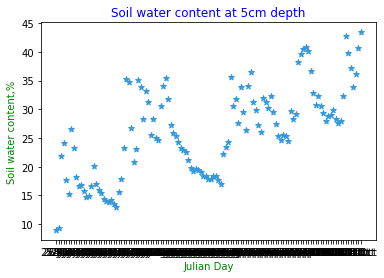

In [564]:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

plt.scatter(df['date'] , df['av_swc'], color='#3498DB',marker='*')
plt.ylabel('Soil water content,%',color='green')
plt.xlabel('Julian Day', color='green')
plt.title('Soil water content at 5cm depth', color='blue')
plt.savefig('av_swc_5cm.pdf')

In [565]:
x = df[['ppt','temp']] # x=df.drop('sm', axis=1)
y = df['av_swc']

# Split the dataset

In [566]:
#https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split

In [567]:
#xtrain,xtest, ytrain,ytest=train_test_split(x,y,test_size=.30) # training data = 70%
xtrain,xtest, ytrain,ytest=train_test_split(x,y,test_size=.15) # training data = 80%
#xtrain,xtest, ytrain,ytest=train_test_split(x,y,test_size=.4) # training data = 95%

In [568]:
x.head()

,ppt,temp
0,0.00,15.15
1,3.91,15.92
2,28.54,17.55
3,5.00,17.03
4,0.07,14.43


In [569]:
y.head()

0     8.983828
1     9.242175
2    21.879268
3    24.168394
4    17.626829
Name: av_swc, dtype: float64

In [570]:
xtrain.head()

,ppt,temp
49,1.47,21.82
104,2.98,6.78
37,0.79,14.90
1,3.91,15.92
9,5.31,12.23


In [571]:
ytrain.head()

49     24.212103
104    30.718056
37     31.324527
1       9.242175
9      16.596415
Name: av_swc, dtype: float64

In [572]:
xtest.head()

,ppt,temp
100,1.64,9.28
17,2.40,12.84
83,11.16,13.00
57,0.06,13.23
51,1.50,20.15


# MLR Model Creation

In [573]:
from sklearn.linear_model import LinearRegression

In [574]:
reg = LinearRegression()    # obj

In [575]:
reg.fit(xtrain, ytrain)     # Training ML Model

LinearRegression()

In [576]:
df['predicted SWC'] = reg.predict(x)

In [577]:
#df.head(20)

In [578]:
pred = reg.predict(xtest)

In [579]:
pred                                     # corr. result of ytest / y

array([28.88801208, 25.74589708, 27.86651186, 24.77354165, 18.65616553,
       25.46109481, 22.48981927, 22.52630343, 18.34872347, 28.76762132,
       27.99171183, 29.63534838, 32.32546263, 33.8776413 , 24.97213024,
       26.82274581, 22.78155872, 27.34452376, 25.09571253])

In [580]:
#df.to_excel("SWC_output_70pdataTrain.xlsx")

In [581]:
from sklearn.metrics import mean_squared_error           #the lower the value the better 

In [582]:
mse = mean_squared_error(ytest, pred)

In [583]:
mse

46.8792164251711

In [584]:
from sklearn.metrics import mean_absolute_error #MAE lower than 20% is considered good for time series forecasting

In [585]:
mae = mean_absolute_error(ytest, pred)

In [543]:
mae

4.245414143023047

In [544]:
#accuracy=r2_score(ytest,pred)*100
#print(" Accuracy of the model is %.2f" %accuracy)

In [545]:
xtest.head(10)

,ppt,temp
6,18.73,8.52
104,2.98,6.78
15,2.49,15.05
97,9.60,9.96
60,2.03,18.67
107,0.01,5.43
75,0.32,13.55
112,0.54,7.67
55,0.16,20.06
35,10.68,14.30


In [546]:
ytest.head(10)

6      26.642636
104    30.718056
15     20.183915
97     38.176852
60     18.396496
107    29.289630
75     29.550833
112    28.370463
55     19.182407
35     28.217140
Name: av_swc, dtype: float64

In [547]:
pred

array([33.00971387, 30.91003757, 23.48144347, 29.62657025, 20.17302662,
       31.4180271 , 24.30694764, 29.55904179, 18.51143718, 26.03706004,
       21.2583303 , 18.88797269, 24.15811349, 34.02090315, 27.29789739,
       28.58679724, 18.74141501, 34.57042202, 22.28504939])

# Best fit line

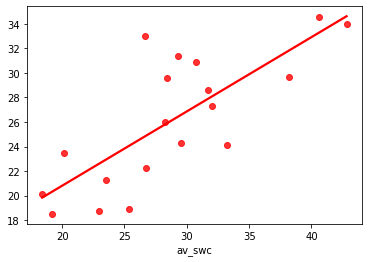

In [548]:
sns.regplot(x=ytest,y=pred,ci=None,color ='red');

In [549]:
#Statistical Details of the dataset
#df.describe()

In [550]:
#df_pred=pd.DataFrame{'Actual Value':ytest,'Predicted Value':pred,'Difference':ytest-pred}
#pred_df['Actual Value','Predicted Value','Difference'] = pd.DataFrame{ytest,pred,ytest-pred}
#df_pred=pd.DataFrame{ytest,pred,ytest-pred}
df['Difference'] = ytest - pred                                # reg.predict(x)
df.head(10)

,date,ppt,temp,swc,av_swc,predicted SWC,Difference
0,25-Jun,0.00,15.15,6.853846,8.983828,22.817705,NaN
1,26-Jun,3.91,15.92,7.079167,9.242175,23.039940,NaN
2,27-Jun,28.54,17.55,16.808333,21.879268,27.288524,NaN
3,28-Jun,5.00,17.03,17.379167,24.168394,22.309899,NaN
4,29-Jun,0.07,14.43,13.500000,17.626829,23.470768,NaN
5,30-Jun,1.52,15.29,12.537500,15.303837,23.045041,NaN
6,01-Jul,18.73,8.52,21.883333,26.642636,33.009714,-6.367078
7,02-Jul,0.09,8.98,18.175000,23.184981,28.296290,NaN
8,03-Jul,0.01,14.19,15.516667,18.121899,23.669202,NaN
9,04-Jul,5.31,12.23,14.900000,16.596415,26.627451,NaN


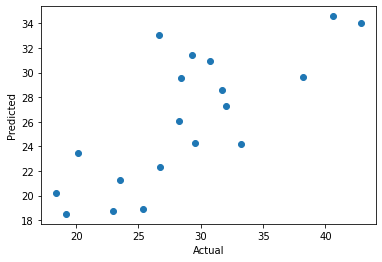

In [551]:
plt.scatter(ytest,pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');
#plt.figure(figsize=(12,8)) #
#plt.scatter(df['day'] , df['sm'], color='#3498DB',marker='*')
#plt.plot(xtest, reg.predict(xtest), marker = 'o',color='black')